<a href="https://colab.research.google.com/github/RuixinGan/FinalGroupProject/blob/main/%E2%80%9CMidterm___MLC___CUSP_GX_7033_questions_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam - MLC Fall 2024

Total points for the midterm exam: 15. More detailed instructions are in the PDF file in Brightspace.

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

## Part A - Ensemble Methods (30% + 10% with optional extra)

### Task 1: Create and Visualize Decision Trees (extra 10%)

##### This task 1 (decision trees) is optional, and you can get an extra 10% if you decide to do this task.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The provided **Telecom dataset** encompasses diverse parameters associated with telecom customers and aims to predict whether a customer is likely to stay (Contract Closure = 0) or leave (Contract Closure = 1) the telecom service provider. Each row represents a customer, and the columns include various features such state, total miutes of usage internet service, and more. The target variable, "Contract Closure," serves as the binary indicator for customer churn prediction, with 0 indicating the customer stays and 1 indicating the customer leaves the telecom service.

In [3]:
# Load the dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLC_midterm/telecom_dataset.csv')
data=data.dropna()

In [4]:
# Split the dataset into features and target variable ("Contract Closure")
data
data.columns

Index(['State_FIPS', 'Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Contract Closure'],
      dtype='object')

In [5]:
features = data.drop("Contract Closure", axis=1)
target = data["Contract Closure"]

In [6]:
# Split data into 80% train, 20% test, random_state=999
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=999)

# Print head
X_train.head()

,State_FIPS,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1193,27,173,510,0,291.8,143,49.61,214.3,134,18.22,151.2,119,6.80,9.9,2,2.67,0
2512,56,57,408,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0
2383,51,138,415,0,251.0,119,42.67,91.2,96,7.75,142.2,87,6.40,13.8,3,3.73,3
1743,38,82,415,29,163.8,77,27.85,134.9,112,11.47,79.3,95,3.57,8.8,2,2.38,2
1396,32,130,510,0,154.2,119,26.21,110.2,98,9.37,227.4,117,10.23,9.2,5,2.48,2


In [7]:
Y_train.head()

1193    1
2512    0
2383    0
1743    0
1396    0
Name: Contract Closure, dtype: int64

In [8]:
X_test.head()

,State_FIPS,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
618,16,114,408,19,154.6,100,26.28,241.6,109,20.54,160.0,112,7.20,12.6,1,3.40,3
1327,30,80,408,15,159.3,110,27.08,170.6,120,14.50,141.2,82,6.35,11.9,5,3.21,1
2104,46,103,510,0,206.5,125,35.11,180.2,113,15.32,220.6,95,9.93,12.2,4,3.29,3
2274,49,133,408,44,174.0,80,29.58,209.4,113,17.80,224.1,87,10.08,14.1,7,3.81,2
2483,55,63,510,34,152.2,119,25.87,227.1,91,19.30,195.7,103,8.81,12.3,5,3.32,1


In [9]:
Y_test.head()

618     0
1327    0
2104    0
2274    1
2483    0
Name: Contract Closure, dtype: int64

#### a. Evaluate the model. Report on in-sample (training data) and out-of-sample (test data).

In [10]:
# Build the decision tree model with max_depth = 2:

# your code here
dt = DecisionTreeClassifier(max_depth=2, random_state=999)
dt.fit(X_train, Y_train)


# In-sample accuracy:

# your code here
print('In sample accuracy:',dt.score(X_train,Y_train))

# Out-of-sample accuracy:

# your code here
print('Out of sample accuracy:',dt.score(X_test,Y_test))

In sample accuracy: 0.8792434529582929
Out of sample accuracy: 0.8662790697674418


In [11]:
# Make predictions on the test set

# your code here
test_pre = dt.predict(X_test)
test_pre

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

#### b. Visualize the decision tree.

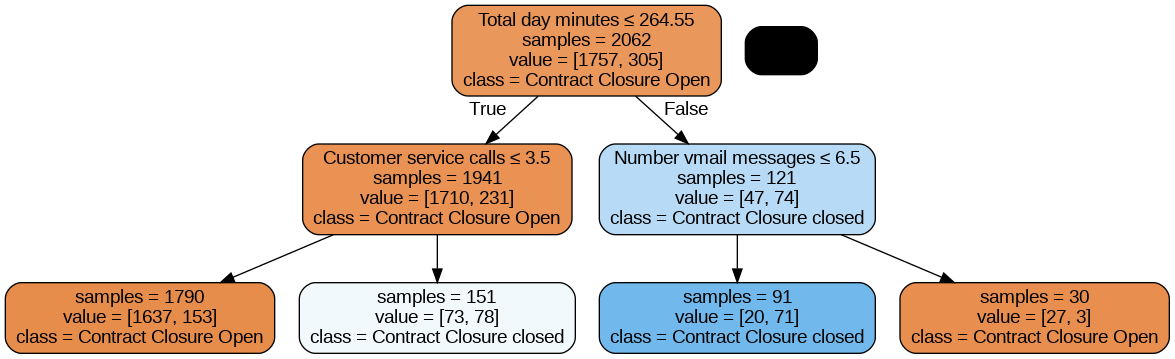

In [12]:
# Visualize the decision tree

# your code here

# This will only work if GraphViz is installed on your machine
from sklearn import tree
from IPython.display import Image
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,
                         feature_names=X_train.columns.values,
                         class_names=['Contract Closure Open','Contract Closure closed'],
                         filled=True, rounded=True,
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)
Image(graph.create_png())

#### c. List the top 5 most important features in order.

In [13]:
# your code here
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
4,Total day minutes,0.43211
16,Customer service calls,0.404648
3,Number vmail messages,0.163242
10,Total night minutes,0.0
15,Total intl charge,0.0


### Task 2: Ensemble Method Implementation (30%)

The goal of this task is to implement a **bagging and a boosting model** . Evaluate their performance on your dataset, providing insights into the differences in their error metrics, and discuss why one might outperform the other in this context.

In [14]:
# Suggested steps:
# 1) Split the data into training and testing sets, ensuring to respect the time series nature if applicable.
# 2) Implement a Bagging Regressor and a Gradient Boosting Regressor.
# 3) Evaluate both models using appropriate metrics for your problem.
# 4) Provide a comparative analysis of their performances.

The **AAPL, V, and GOOG datasets** consists of stock quotes companies, where the "Adj Close" price serves as the target variable, reflecting the adjusted closing price of Apple's stock over a specific period.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Below are several first steps of data processing. Make sure that you understand and follow those steps.

In [16]:
import pandas as pd
import os

# Define the path to the folder and the file names - change if needed
folder_path = '/content/drive/MyDrive/Colab Notebooks/MLC_midterm/Data'
file_names = ['AAPL.csv', 'V.csv', 'GOOG.csv']

# Function to load a CSV, transform the 'Dt' column, and set it as the index
def load_and_transform(file_path):
    df = pd.read_csv(file_path)
    df['Dt'] = pd.to_datetime(df['Dt'])
    df.set_index('Dt', inplace=True)
    return df

# Load all dataframes with the date transformations
dataframes = {name.split('.')[0]: load_and_transform(os.path.join(folder_path, name)) for name in file_names}

# Perform a series of left joins to combine the dataframes on their index
df = dataframes['AAPL']
for df_name in ['V', 'GOOG']:
    df = df.join(dataframes[df_name], how='left', lsuffix='_AAPL', rsuffix=f'_{df_name}')

df.head()

,Adj Close_AAPL,Close_AAPL,Div_AAPL,Factor_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Adj Close_V,Close_V,...,Open_V,Volume_V,Adj Close,Close,Div,Factor,High,Low,Open,Volume
Dt,,,,,,,,,,,,,,,,,,,,,
2017-01-03,110.9539,116.15,0.0,1.0,116.330,114.76,115.8000,28781900.0,78.0492,79.50,...,78.76,13785200.0,786.14,786.14,0.0,1.0,789.630,775.800,778.81,1657300.0
2017-01-04,110.8297,116.02,0.0,1.0,116.510,115.75,115.8500,21118100.0,78.6874,80.15,...,79.44,8033100.0,786.90,786.90,0.0,1.0,791.340,783.160,788.36,1073000.0
2017-01-05,111.3933,116.61,0.0,1.0,116.864,115.81,115.9200,22193600.0,79.6102,81.09,...,80.34,7805100.0,794.02,794.02,0.0,1.0,794.480,785.020,786.08,1335200.0
2017-01-06,112.6351,117.91,0.0,1.0,118.160,116.47,116.7789,31751900.0,80.7098,82.21,...,81.30,8898300.0,806.15,806.15,0.0,1.0,807.900,792.204,795.26,1640200.0
2017-01-09,113.6668,118.99,0.0,1.0,119.430,117.94,117.9500,33561900.0,80.2582,81.75,...,82.28,7305300.0,806.65,806.65,0.0,1.0,809.966,802.830,806.40,1274600.0


In [17]:
# Assuming 'df' is your DataFrame and 'Adj Close_AAPL' is the target variable
X = df.drop('Adj Close_AAPL', axis=1)
y = df['Adj Close_AAPL']

# fill NA
X = X.fillna(0)

# Data Splitting, considering its temporal nature
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#### a. Train and test Bagging Model.

In [18]:
# your code here
from sklearn.linear_model import LinearRegression

bg = BaggingRegressor(LinearRegression(), n_estimators=100, max_samples=0.7, max_features=0.8, random_state=28)
bg.fit(X_train, y_train)

# Predict and score the model
bg_y_test_hat = bg.predict(X_test)


#### b. Train and test Boosting Model.

In [19]:
# your code here
gbdt = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=28)
gbdt.fit(X_train, y_train)

# Predict and score the model
gbdt_y_test_hat = gbdt.predict(X_test)


#### c. Evaluate the model and report (use Mean squared error; Mean absolute error; and R2).  

In [20]:
# Model Evaluation using more metrics

# your code here:
mse_bagging = mean_squared_error(y_test, bg_y_test_hat)
mae_bagging = mean_absolute_error(y_test, bg_y_test_hat)
r2_bagging = r2_score(y_test, bg_y_test_hat)

mse_boosting = mean_squared_error(y_test, gbdt_y_test_hat)
mae_boosting = mean_absolute_error(y_test, gbdt_y_test_hat)
r2_boosting = r2_score(y_test, gbdt_y_test_hat)


# Printing out the performance metrics with explanations

# your code here
print(mse_bagging,mae_bagging,r2_bagging)
print(mse_boosting,mae_boosting,r2_boosting)

0.5222220985320039 0.6314705208362353 0.9983158716384982
31.810617171186948 3.5126148171176395 0.8974130686436538


#### d. Hyperparameter Tuning and Model Optimization.  

In [21]:
# Possible steps:
# 1) Choose an ensemble model for hyperparameter tuning (one with the best performance in a previous step).
# 2) Define a parameter grid to explore.
# 3) Use GridSearchCV to find the optimal parameters.
# 4) Retrain the model using the best parameters and evaluate its performance.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
# This part is partly from ChatGPT
# 1. Choose the model you wish to tune

# your code here
gbdt_best = GradientBoostingRegressor()


# 2. Define a comprehensive grid of parameters to search

# your code here
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}


# 3. Perform grid search and identify the best parameters

# your code here
grid_search = GridSearchCV(estimator=gbdt_best, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


# 4. Get the best parameters from the grid search

# your code here
best_params_boosting = grid_search.best_params_
print("Best parameters found for Boosting model: ", best_params_boosting)


# 5. Retrain the model with the best parameters and evaluate its performance

# your code here
best_boosting_model = GradientBoostingRegressor(**best_params_boosting)
best_boosting_model.fit(X_train, y_train)


# 6. Output the performance metrics

# your code here
predictions_boosting = best_boosting_model.predict(X_test)

mse_boosting = mean_squared_error(y_test, predictions_boosting)
mae_boosting = mean_absolute_error(y_test, predictions_boosting)
r2_boosting = r2_score(y_test, predictions_boosting)

print(f"Boosting Model Evaluation:\nMSE: {mse_boosting}\nMAE: {mae_boosting}\nR2: {r2_boosting}")



Best parameters found for Boosting model:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Boosting Model Evaluation:
MSE: 26.70574924732409
MAE: 3.1051691317188546
R2: 0.9138758971537173


#### e. Conceptual Questions
- Describe the trade-offs between bias and variance when using ensemble methods.
- How does increasing the diversity of models in an ensemble affect its performance?
- Discuss the implications of temporal dependencies in time series data on the choice and performance of ensemble methods.

In [24]:
# your answer to questions here

a. In general, increasing the complexity of the model increases the variance of the model, but decreases the bias of the model, so we want to find a variance-bias tradeoff that makes the test mean square error the most. For example, we can use the feature extraction method, first construct a model with more features to make it overfitting, at this time the training error is very small and the test error is very large, then at this time we add a penalty about the number of features. Another commonly used method is K-fold cross-validation: we divide the training samples into K equal parts, and then use K-1 samples as the training set, and the remaining sample set as the validation set to estimate the accuracy of the model obtained from the K-1 samples.

b. First, diversity can reduce the bias of the integrated model. When there is a large variability among the base classifiers, the integrated model can better capture different data features and decision rules, thus reducing the risk of misjudgment.
Second, diversity can increase the robustness of the integrated model. By increasing the voting weights of different classifiers, the integrated model can better cope with data uncertainty and noise, which improves the stability and generalization ability of the model.

c. For time series models, the problem with integrated learning is that each data point has a time dependency. If we view the data as a whole using traditional integration methods such as bagging, boosting and random forests, we may ignore the time-dependent component. Time dependency needs to be introduced explicitly by means of feature engineering (e.g., adding lag terms, rolling statistics, etc.). In addition, cross-validation techniques suitable for time series need to be employed when training and validating the model.

## Part B - Support Vector Machines (40%)

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

### Task 1: SVM Decision Boundaries and C Parameter Investigation (20%)

**The Iris dataset** is a classic in the field of machine learning and statistics, introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset consists of 150 samples from three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each sample is described by four features: the length and the width of the sepals and petals, in centimeters. See [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

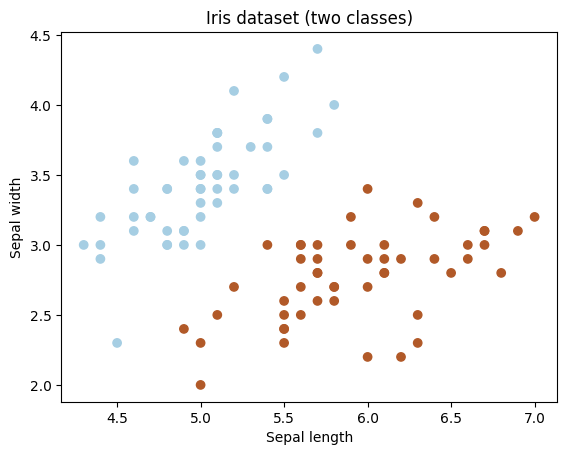

In [26]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# In the first task, we will consider only 2 classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (two classes)')
plt.show()

#### a. Consider the dataset above. Based on the visual inspection of the plot provided, how would you train an SVM model for this dataset? Explain your choice of kernel and parameters.

In [27]:
# your answer here
from sklearn import svm

clf = svm.SVC(kernel='linear',C=100000)
clf.fit(X, y)

SVC(C=100000, kernel='linear')

It is clear from the plot that for binary classes I can use linear kernel. Larger C values aim for higher separation margins.

**Assuming you chose to train a linear SVM with C=100000; answer the following five questions:**

#### b. Report the separating hyperplane.

In [28]:
# your answer here
# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w = clf.coef_[0]  # Extracting the weights
a = -w[0] / w[1]
b = -(clf.intercept_[0]) / w[1]
print(f'x2 = {a} * x1 + {b}')

x2 = 1.2000004017679615 * x1 + -3.290002325470126


<ipython-input-29-f4a0127e40d6>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.get_cmap('coolwarm', 2))


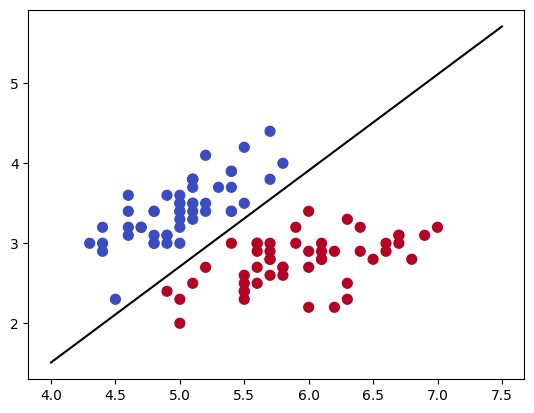

In [29]:

w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(4, 7.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.plot(x1, x2, 'k-')
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()


#### c. List the support vectors.

In [30]:
# your answer here
# your code here
svs = clf.support_vectors_
svs

array([[5.5, 3.5],
       [4.5, 2.3],
       [4.9, 2.4],
       [5.4, 3. ]])

#### d. Calculate the upper and lower hyperplanes (lines) of the margin

In [31]:
# your answer here
# plot the parallels to the separating hyperplane (slope = a) that go through the support vectors.

b = clf.support_vectors_[0]
print(f'x2_down = {a} * x1 + {(b[1] - a * b[0])}')

b = clf.support_vectors_[-1]
print(f'x2_up = {a} * x1 + {(b[1] - a * b[0])}')

x2_down = 1.2000004017679615 * x1 + -3.1000022097237885
x2_up = 1.2000004017679615 * x1 + -3.4800021695469923


#### e. Compute the width of the margin

In [32]:
# your answer here
margin_width = 2 / np.linalg.norm(w)
margin_width

0.24319362349362722

#### f. Using the provided SVM model with a high value of C (e.g., C=100000), plot the decision boundaries and margins. Then, adjust the SVM model by setting a very small value for the constant C (e.g., C=0.01). How do you expect this change to affect the margin width? Plot the new decision boundaries and margins and compare them to the previous plot to validate your expectations. Interpret the results

In [33]:
# Suggested steps:
# 1) Train a linear SVM with a large C value (optional if you already did)
# 2) Plot the decision boundaries and margins
# 3) Now train another linear SVM with a small C value
# 4) Plot the new decision boundaries and margins

In [34]:
# Train a linear SVM with a large C value (optional since we already did)

# your code here

In [35]:
# your plot here

In [36]:
# Now train another linear SVM with a small C value

# your code here
clf2 = svm.SVC(kernel='linear',C=0.01)
clf2.fit(X, y)

SVC(C=0.01, kernel='linear')

In [37]:
w2 = clf2.coef_[0]  # Extracting the weights
a2 = -w2[0] / w2[1]
b2 = -(clf2.intercept_[0]) / w2[1]
print(f'x2 = {a2} * x1 + {b2}')

x2 = 1.4133738601823693 * x1 + -4.856230466199141


<ipython-input-38-49ecdda4fe02>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.get_cmap('coolwarm', 2), label='Samples')


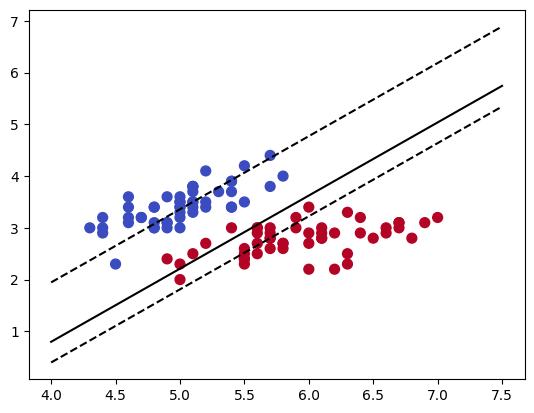

In [38]:
# your plot here
# optional plot here
x1 = np.linspace(4, 7.5)
x2 = a2 * x1 - (clf2.intercept_[0]) / w2[1]

b2 = clf2.support_vectors_[0]
x2_down = a2 * x1 + (b2[1] - a2 * b2[0])

b2 = clf2.support_vectors_[-1]
x2_up = a2 * x1 + (b2[1] - a2 * b2[0])



plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1],
            s=200, facecolors='none')

plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.get_cmap('coolwarm', 2), label='Samples')
plt.show()

### Task 2: Training using SVM (20%)

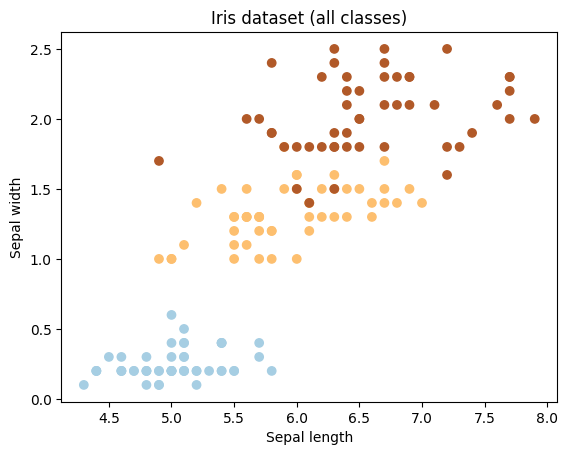

In [39]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
X = df[['sepal length (cm)','petal width (cm)']].values  # Select the first two features for visualization purposes
y = df.target

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (all classes)')
plt.show()

#### a. Train a linear SVM and a non-linear SVM with RBF kernel using the training set. Use the default arguments, make predictions and calculate accuracy on test set.

In [40]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [41]:
# Standardize the data

#your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Train a linear SVM

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [43]:
# Train a non-linear SVM with RBF kernel

rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train_scaled, y_train)

SVC()

In [44]:
# Make predictions and calculate accuracy on test out-of-sample set


#your code here

correct=1.0*(linear_svc.predict(X_test_scaled)==np.asarray(y_test)).sum()/len(y_test)
print("Out of sample, linear model successfully predicts {} percent of the data".format((correct)*100))

correct=1.0*(rbf_svc.predict(X_test_scaled)==np.asarray(y_test)).sum()/len(y_test)
print("Out of sample, non-linear model successfully predicts {} percent of the data".format((correct)*100))

Out of sample, linear model successfully predicts 94.0 percent of the data
Out of sample, non-linear model successfully predicts 96.0 percent of the data


In [45]:
# Plot decision boundaries (example code below)

def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)

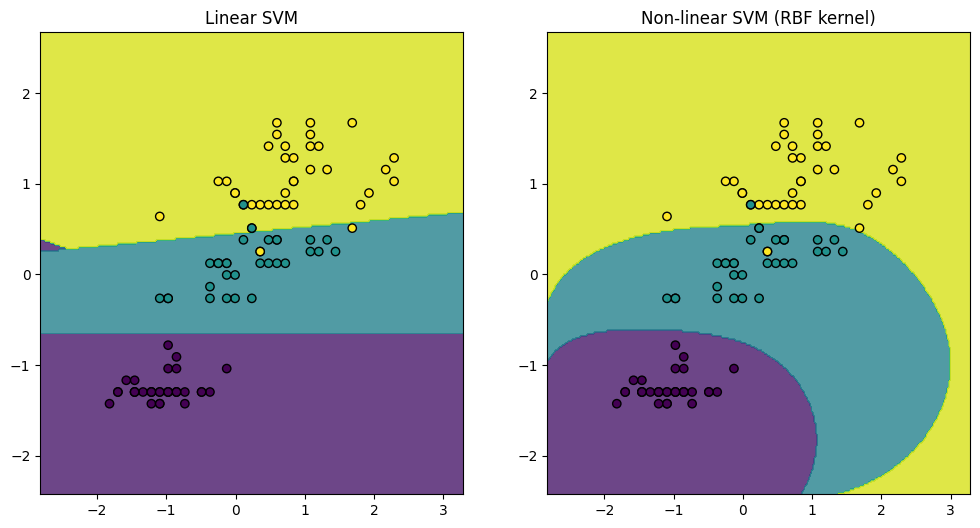

In [46]:
# Plot decision boundaries (example code below)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(linear_svc, X_train_scaled, y_train, "Linear SVM")
plt.subplot(1, 2, 2)
plot_decision_boundary(rbf_svc, X_train_scaled, y_train, "Non-linear SVM (RBF kernel)")
plt.show()



#### b. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [49]:
# Train your model.

#your code here
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)

# Report IS and OS results.

#your code here
correct=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
print("In of sample, the polynomial kernel successfully predicts {} percent of the data".format((correct)*100))

correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, the polynomial kernel successfully predicts {} percent of the data".format((correct)*100))

In of sample, the polynomial kernel successfully predicts 94.0 percent of the data
Out of sample, the polynomial kernel successfully predicts 94.0 percent of the data


#### c. Try polynomials of degree 1,2,3,4,5. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below. Plot the graph of "Accuracy vs log(C)" for each degree.

In [50]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset.
# Denote the remaining training data by (X_train_1, Y_train_1).

X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

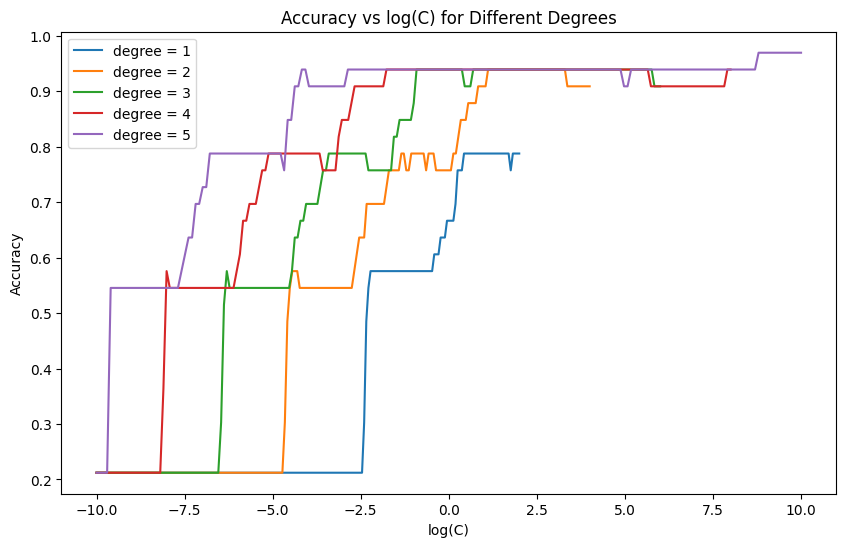

In [51]:
#your code here
plt.figure(figsize=(10, 6))

import math

for degree in range(1, 6):
    C = [math.exp(i) for i in np.linspace(-10, 2*degree, 200)]  # C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]
    OS_validation = []
    for c in C:
        clf = svm.SVC(kernel='poly', degree=degree, C=c)
        clf.fit(X_train_1, Y_train_1)
        correct = 1.0 * (clf.predict(X_vali) == np.asarray(Y_vali)).sum() / len(Y_vali)  # OS score for validation set
        OS_validation.append(correct)

    C_log = [np.log(y) for y in C]  # For a better graph
    plt.plot(C_log, OS_validation, label=f'degree = {degree}')  # Plot on the same axes

plt.title('Accuracy vs log(C) for Different Degrees')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.legend()  # Add a legend to distinguish between degrees
plt.show()



#### d.  Choose the optimal degree and the optimal regularization constant C based on these graphs. Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected.

In [52]:
# This part is partly from ChatGPT
best_degree = None
best_C = None
best_accuracy = 0

# Iterate through degrees and C values
for degree in range(1, 6):
    C_values = [math.exp(i) for i in np.linspace(-10, 2*degree, 200)]

    for C in C_values:
        clf = SVC(kernel='poly', degree=degree, C=C)
        clf.fit(X_train_1, Y_train_1)
        Y_pred_vali = clf.predict(X_vali)
        accuracy = 1.0 * (clf.predict(X_vali) == np.asarray(Y_vali)).sum() / len(Y_vali)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_degree = degree
            best_C = C

print(f"Best Degree: {best_degree}")
print(f"Best C: {best_C}")
print(f"Best Validation Accuracy: {best_accuracy}")

Best Degree: 5
Best C: 6594.358892268752
Best Validation Accuracy: 0.9696969696969697


In [53]:
poly_svc = SVC(kernel='poly', degree=5, C=6594.358892268752)
poly_svc.fit(X_train_1, Y_train_1)

SVC(C=6594.358892268752, degree=5, kernel='poly')

In [54]:
#Report out-of-sample result

#your code here
correct=1.0*(poly_svc.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, the polynomial kernel successfully predicts {} percent of the data".format((correct)*100))

Out of sample, the polynomial kernel successfully predicts 96.0 percent of the data


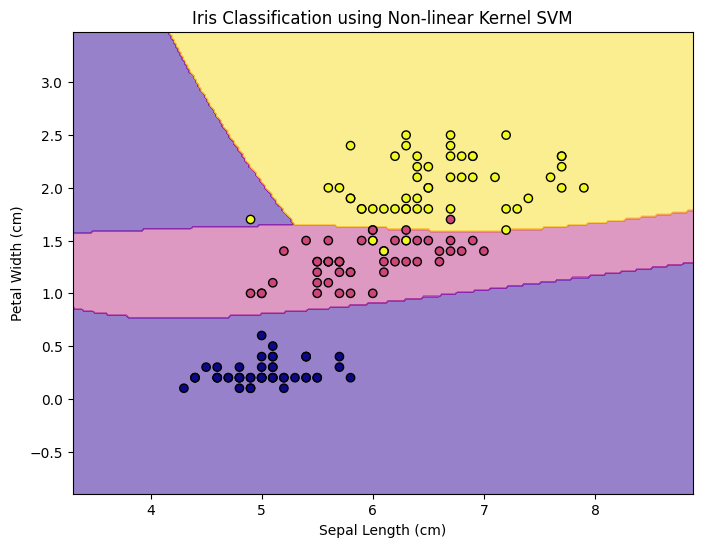

In [55]:
# Plot decision boundary for polynomial SVM using the function (example code below)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Classification using Non-linear Kernel SVM')
plt.show()

## Part C - Hierarchical and K-Means Clustering (30%)

For hierarchical and K-Means clustering, use the **Mall Customer Segmentation Data** from Kaggle. For leader clustering, simulate streaming data or use a large dataset divided into chunks to mimic streaming data, such as transaction data or sensor data streams.

In [126]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLC_midterm/Mall_Customers.csv')

In [127]:
# Start from selecting relevant features for clustering:
# We will be working with two features: 'Annual Income (k$)' and 'Spending Score (1-100)'


#your code here
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [128]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Task 1:  Implement K-Means algorithm (10%)

In [129]:
# Implement K-Means

#your code here
km = KMeans(random_state=234,n_clusters=2)
res=km.fit(X)

print('Cluster assignments:',res.labels_)
print('\nCluster centers:\n',res.cluster_centers_)
print('\nSum of squared errors:',res.inertia_)


Cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Cluster centers:
 [[37.28888889 50.28888889]
 [79.6        50.12727273]]

Sum of squared errors: 181363.59595959593


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25028.020475269415, 21829.13563877983]


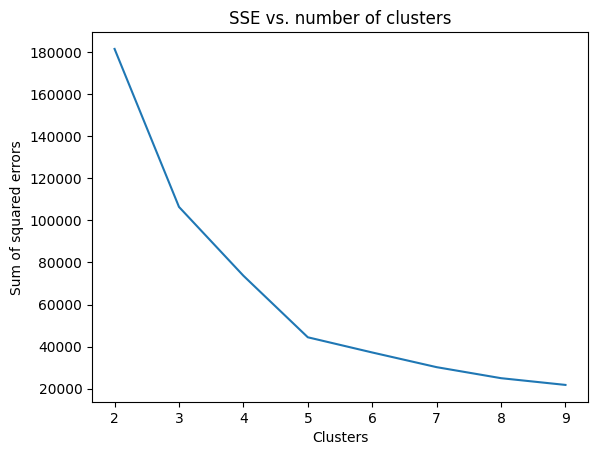

In [130]:
# Check the best number of cluster with any method you like (simple Elbow method is good):

#your code here
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(X)
    SSE.append(res.inertia_)
print(SSE)

plt.gca()
plt.plot(range(2,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


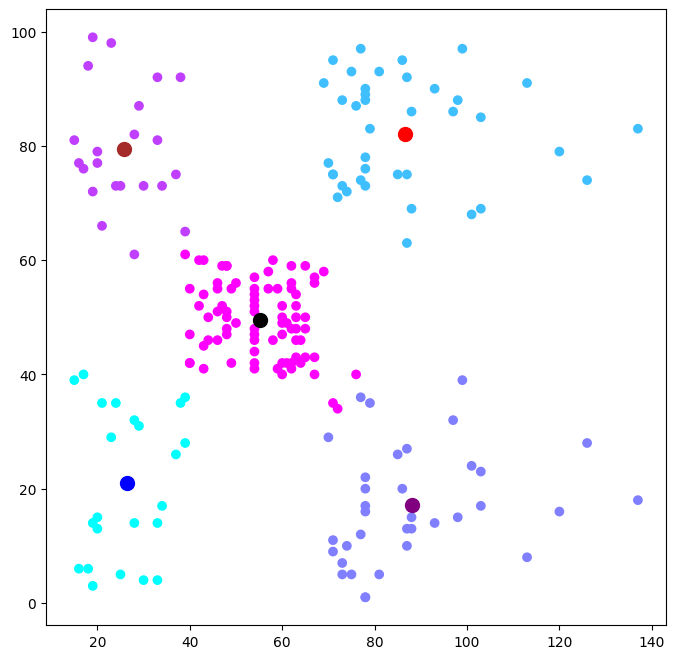

In [131]:
# Plotting clusters

#your code here
X_np = X.to_numpy()

km = KMeans(random_state=234,n_clusters=5)
res=km.fit(X)

plt.figure(figsize=(8,8))
plt.scatter(X_np[:,0],X_np[:,1],c=res.labels_,cmap=plt.cm.cool)
plt.scatter(res.cluster_centers_[0,0],res.cluster_centers_[0,1],c="b",s=100)
plt.scatter(res.cluster_centers_[1,0],res.cluster_centers_[1,1],c="r",s=100)
plt.scatter(res.cluster_centers_[2,0],res.cluster_centers_[2,1],c="purple",s=100)
plt.scatter(res.cluster_centers_[3,0],res.cluster_centers_[3,1],c="brown",s=100)
plt.scatter(res.cluster_centers_[4,0],res.cluster_centers_[4,1],c="black",s=100)
plt.show()


### Task 2:  Implement a Hierarchical Clustering algorithm (10%)

In [132]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

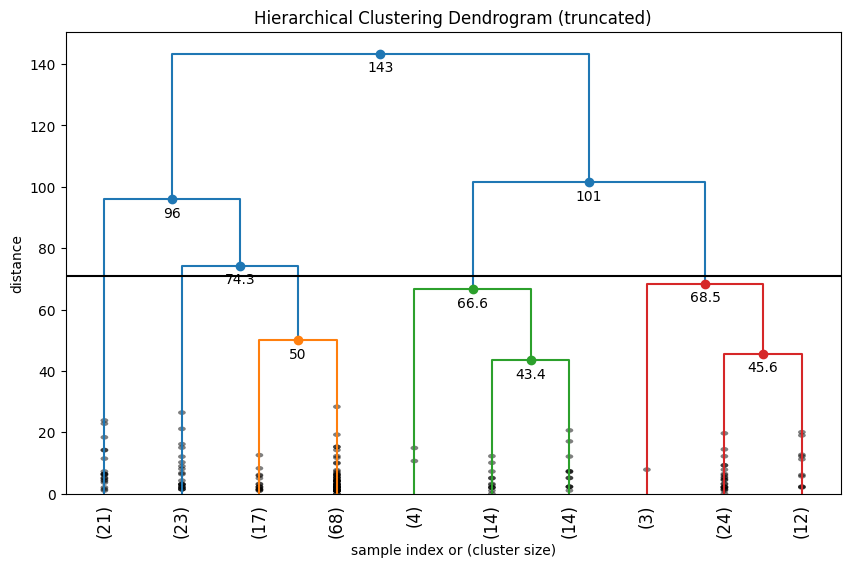

In [138]:
# For Hierarchical Clustering, you can perform Agglomerative Clustering


#your code here

# t is distance threshold to form number of clusters.  p is number of visualization slots (see example)
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


# t is distance threshold to form number of clusters.  p is number of visualization slots (see example)
def distance_thr(Z,t,p):
    plt.figure(figsize=(10,6))
    fancy_dendrogram(
        Z,
        truncate_mode='lastp',
        p=p,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,
        max_d=t,
    )
    plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage
Z_complete = linkage(X, 'complete')
distance_thr(Z_complete,t=71,p=10)

I think set t = 69(4 clusters) will be the optimal choice. Because for t < 66 or 68, the first branch in green cluster with 4 points and the fisrt branch in red cluster with 3 points is relatively tiny compared to other branches, so I think they should be merged into other clusters. And for t > 75, the first branch in blue cluster now will be a single cluster with only 21 points.

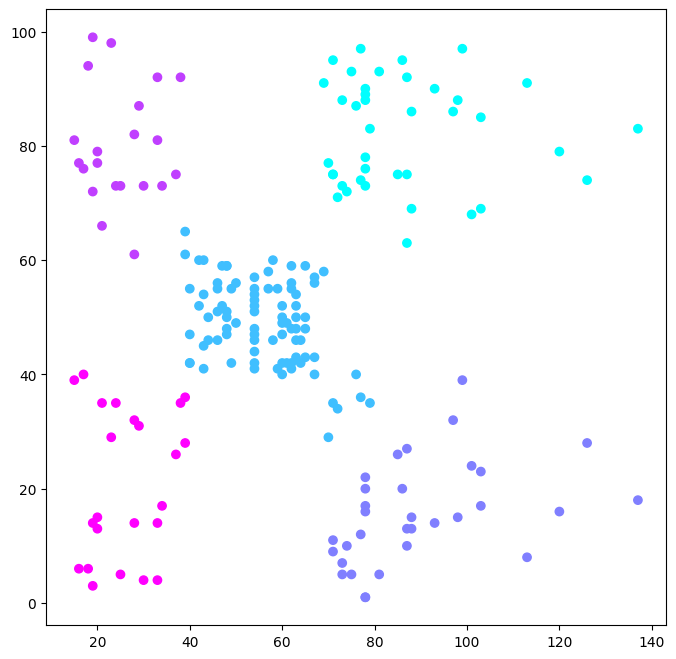

In [143]:
# Plot the clusters (for 2D data)

#your code here
clustering = AgglomerativeClustering(distance_threshold=71,n_clusters=None,linkage='complete')
agg=clustering.fit(X)

plt.figure(figsize=(8,8))
plt.scatter(X_np[:,0],X_np[:,1],c=agg.labels_,cmap=plt.cm.cool)
plt.show()

### Task 3: Evaluate and report clustering quality using silhouette scores (10%).

Silhouette score is a tool for assessing the appropriateness of clustering results by providing a quantitative measure of how well-defined and distinct the clusters are. The Silhouette Score quantifies how well a data point fits into its assigned cluster and how distinct it is from other clusters.

In [135]:
from sklearn.metrics import silhouette_score

# For Hierarchical Model

#your code here
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

range_n_clusters = range(2,10)
for n_clusters in range_n_clusters: #try different numbers of clusters
    clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters)
    cluster_labels = clustering.fit_predict(X)
    #report average Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))


For n_clusters =2, the average silhouette_score is :0.36706444723912895
For n_clusters =3, the average silhouette_score is :0.4618340266628975
For n_clusters =4, the average silhouette_score is :0.4916598193892782
For n_clusters =5, the average silhouette_score is :0.5529945955148897
For n_clusters =6, the average silhouette_score is :0.5380208285578872
For n_clusters =7, the average silhouette_score is :0.519904611908887
For n_clusters =8, the average silhouette_score is :0.4326286245782246
For n_clusters =9, the average silhouette_score is :0.43892545672004507


In [136]:


# For K-Means

#your code here
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    #report average Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.2968969162503008


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =3, the average silhouette_score is :0.46761358158775435
For n_clusters =4, the average silhouette_score is :0.4931963109249047
For n_clusters =5, the average silhouette_score is :0.553931997444648


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =6, the average silhouette_score is :0.5376203956398481
For n_clusters =7, the average silhouette_score is :0.5288104473798049


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =8, the average silhouette_score is :0.4579252386192864
For n_clusters =9, the average silhouette_score is :0.4561091950997367


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Discuss which method works the best for this dataset. Elaborate if those methods are good fit for this data.

In [137]:
#your answer here